In [1]:
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt

In [2]:
fruit = pd.read_csv('fruit_data_with_colours.csv')

In [3]:
print(fruit.shape)  

(59, 7)


In [28]:
#create new column name area with value of width * height of each fruit and add it to the dataframe
fruit['area'] = fruit['width'] * fruit['height']



In [29]:
fruit.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score,area
0,1,apple,granny_smith,192,8.4,7.3,0.55,61.32
1,1,apple,granny_smith,180,8.0,6.8,0.59,54.40
2,1,apple,granny_smith,176,7.4,7.2,0.60,53.28
3,2,mandarin,mandarin,86,6.2,4.7,0.80,29.14
4,2,mandarin,mandarin,84,6.0,4.6,0.79,27.60


In [5]:
fruit.tail()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
54,4,lemon,unknown,116,6.1,8.5,0.71
55,4,lemon,unknown,116,6.3,7.7,0.72
56,4,lemon,unknown,116,5.9,8.1,0.73
57,4,lemon,unknown,152,6.5,8.5,0.72
58,4,lemon,unknown,118,6.1,8.1,0.70


In [6]:
print(fruit.describe()) 

       fruit_label        mass      width     height  color_score
count    59.000000   59.000000  59.000000  59.000000    59.000000
mean      2.542373  163.118644   7.105085   7.693220     0.762881
std       1.208048   55.018832   0.816938   1.361017     0.076857
min       1.000000   76.000000   5.800000   4.000000     0.550000
25%       1.000000  140.000000   6.600000   7.200000     0.720000
50%       3.000000  158.000000   7.200000   7.600000     0.750000
75%       4.000000  177.000000   7.500000   8.200000     0.810000
max       4.000000  362.000000   9.600000  10.500000     0.930000


In [7]:
print(fruit['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [8]:
fruit['fruit_name'].value_counts()

fruit_name
apple       19
orange      19
lemon       16
mandarin     5
Name: count, dtype: int64

In [10]:
#types of fruits    
print(fruit.groupby('fruit_name').size())    
sns.countplot(fruit['fruit_name'],label="Count")  

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


ValueError: could not convert string to float: 'apple'

<Axes: xlabel='fruit_name', ylabel='color_score'>

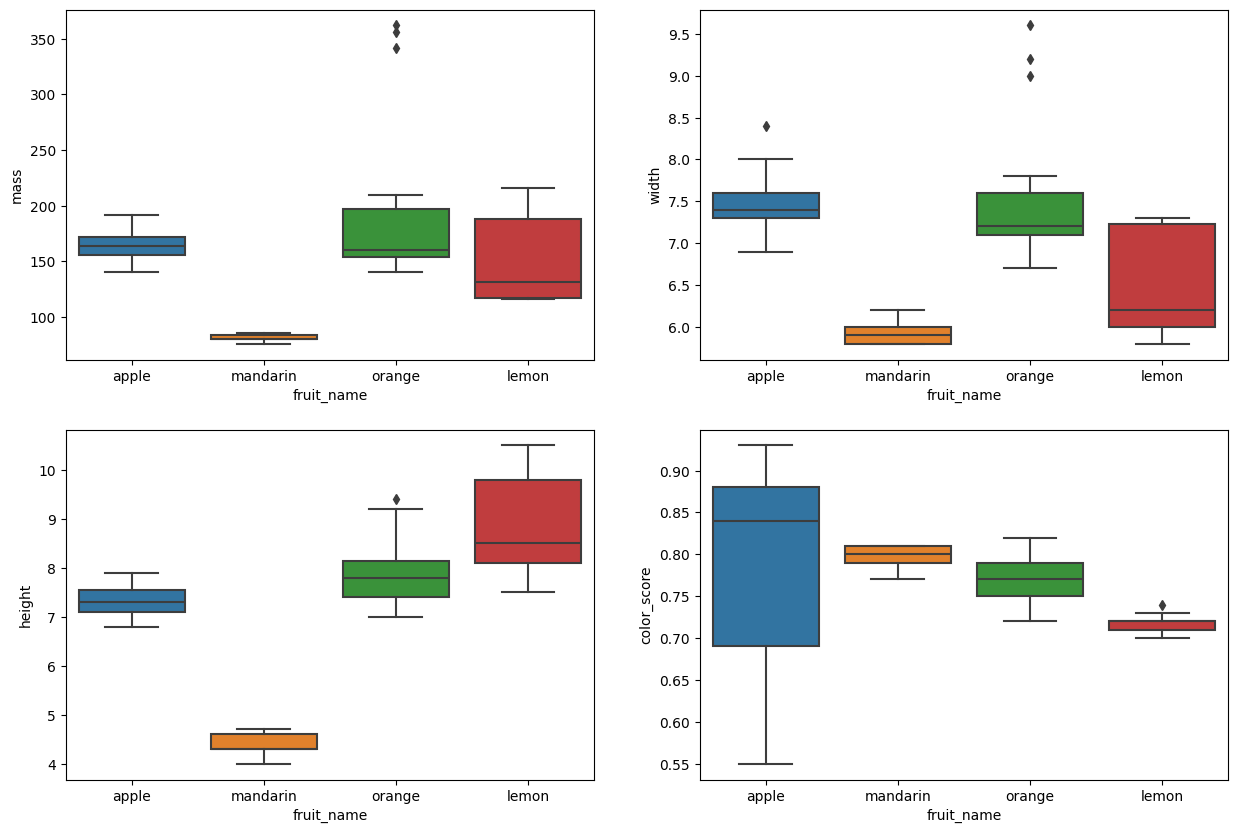

In [11]:
#Boxplot    
plt.figure(figsize=(15,10))    
plt.subplot(2,2,1)    
sns.boxplot(x='fruit_name',y='mass',data=fruit)    
plt.subplot(2,2,2)    
sns.boxplot(x='fruit_name',y='width',data=fruit)    
plt.subplot(2,2,3)    
sns.boxplot(x='fruit_name',y='height',data=fruit)    
plt.subplot(2,2,4)    
sns.boxplot(x='fruit_name',y='color_score',data=fruit)   

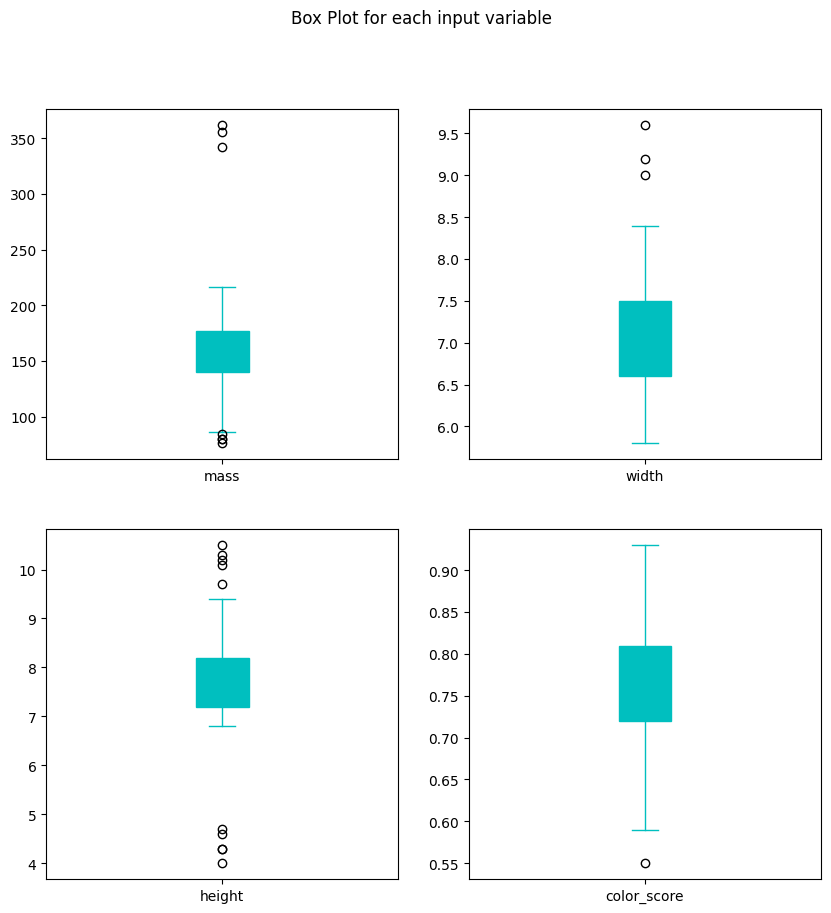

In [12]:
fruit.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), 
                                        sharex=False, sharey=False, figsize=(10,10), 
                                        color ='c', patch_artist=True)
plt.suptitle("Box Plot for each input variable")
plt.savefig('fruits_boxplot')
plt.show()

/var/folders/_p/h6xpn4n166v25749k5gr_rgc0000gn/T/ipykernel_8699/837121767.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/plotting/_matplotlib/misc.py:97: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


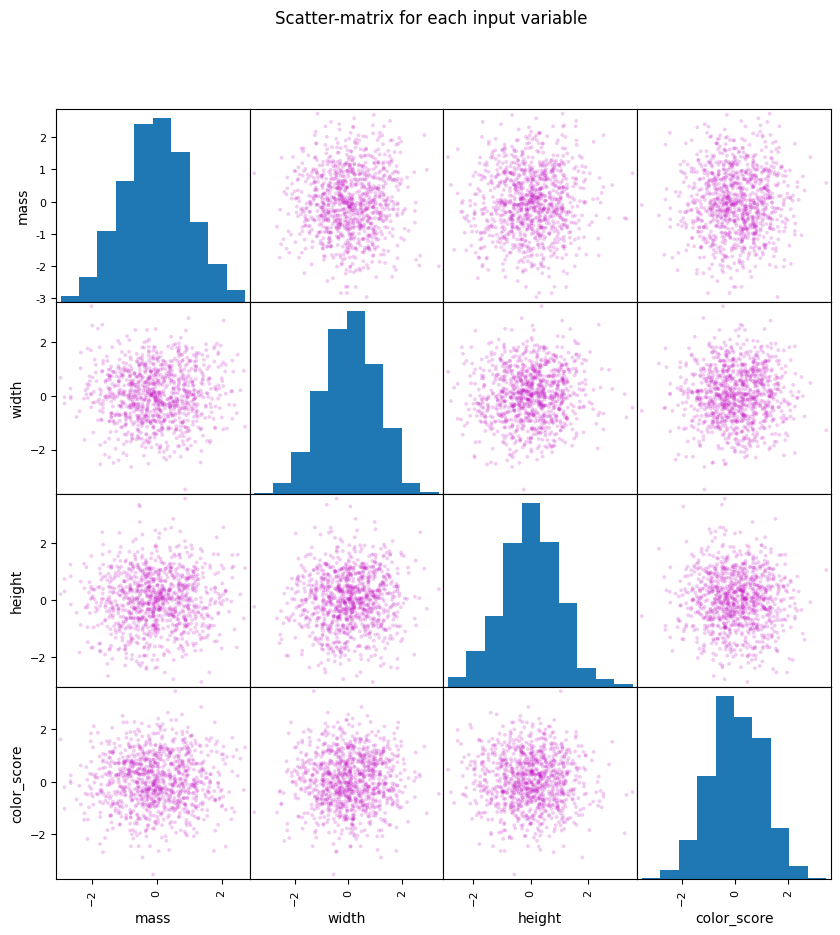

In [13]:
#Scatter Matrix
from pandas.plotting import scatter_matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
df = pd.DataFrame(np.random.randn(1000, 4), columns=['mass', 'width', 'height', 'color_score'])
scatter_matrix(df, alpha=0.2, cmap = cmap, figsize=(10,10), marker = '.', s=30, hist_kwds={'bins':10}, range_padding=0.05, color = 'm')
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruit_scatter_matrix')

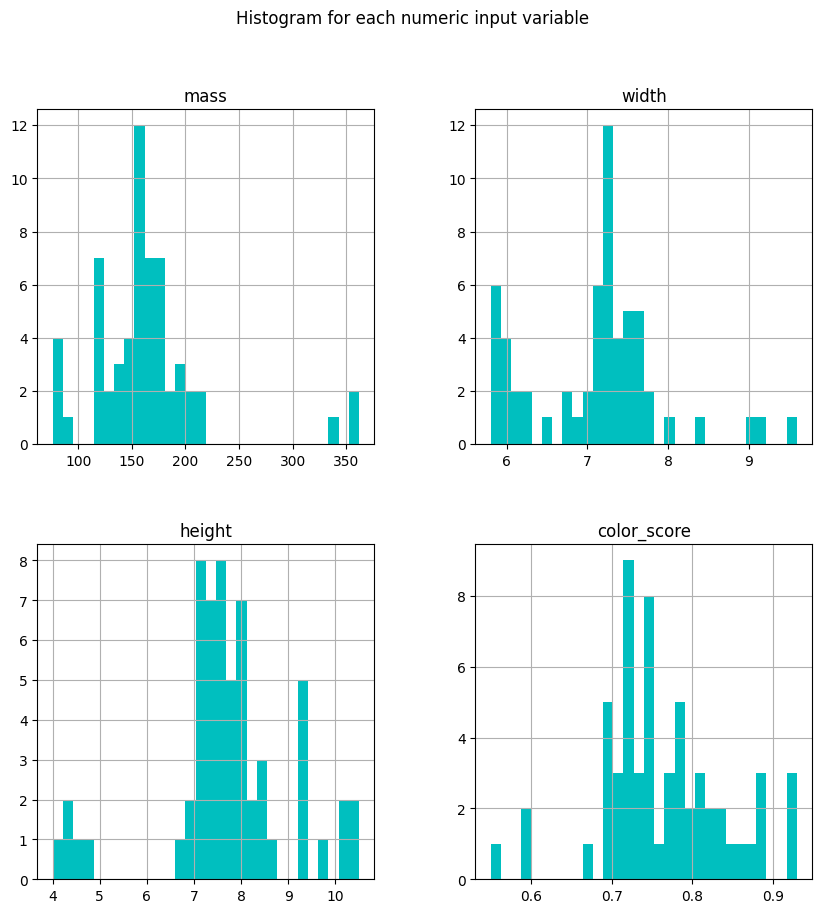

In [14]:
#Histogram
# PyLab is a module that belongs to the Python mathematics library Matplotlib. 
# PyLab combines the numerical module numpy with the graphical plotting module pyplot
import pylab as pl

# To create a histogram, we will use pandas hist() method.
fruit.drop('fruit_label', axis=1).hist(bins=30, figsize=(10,10), color = "c", ec = "m", lw=0)
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_histogram')
plt.show()

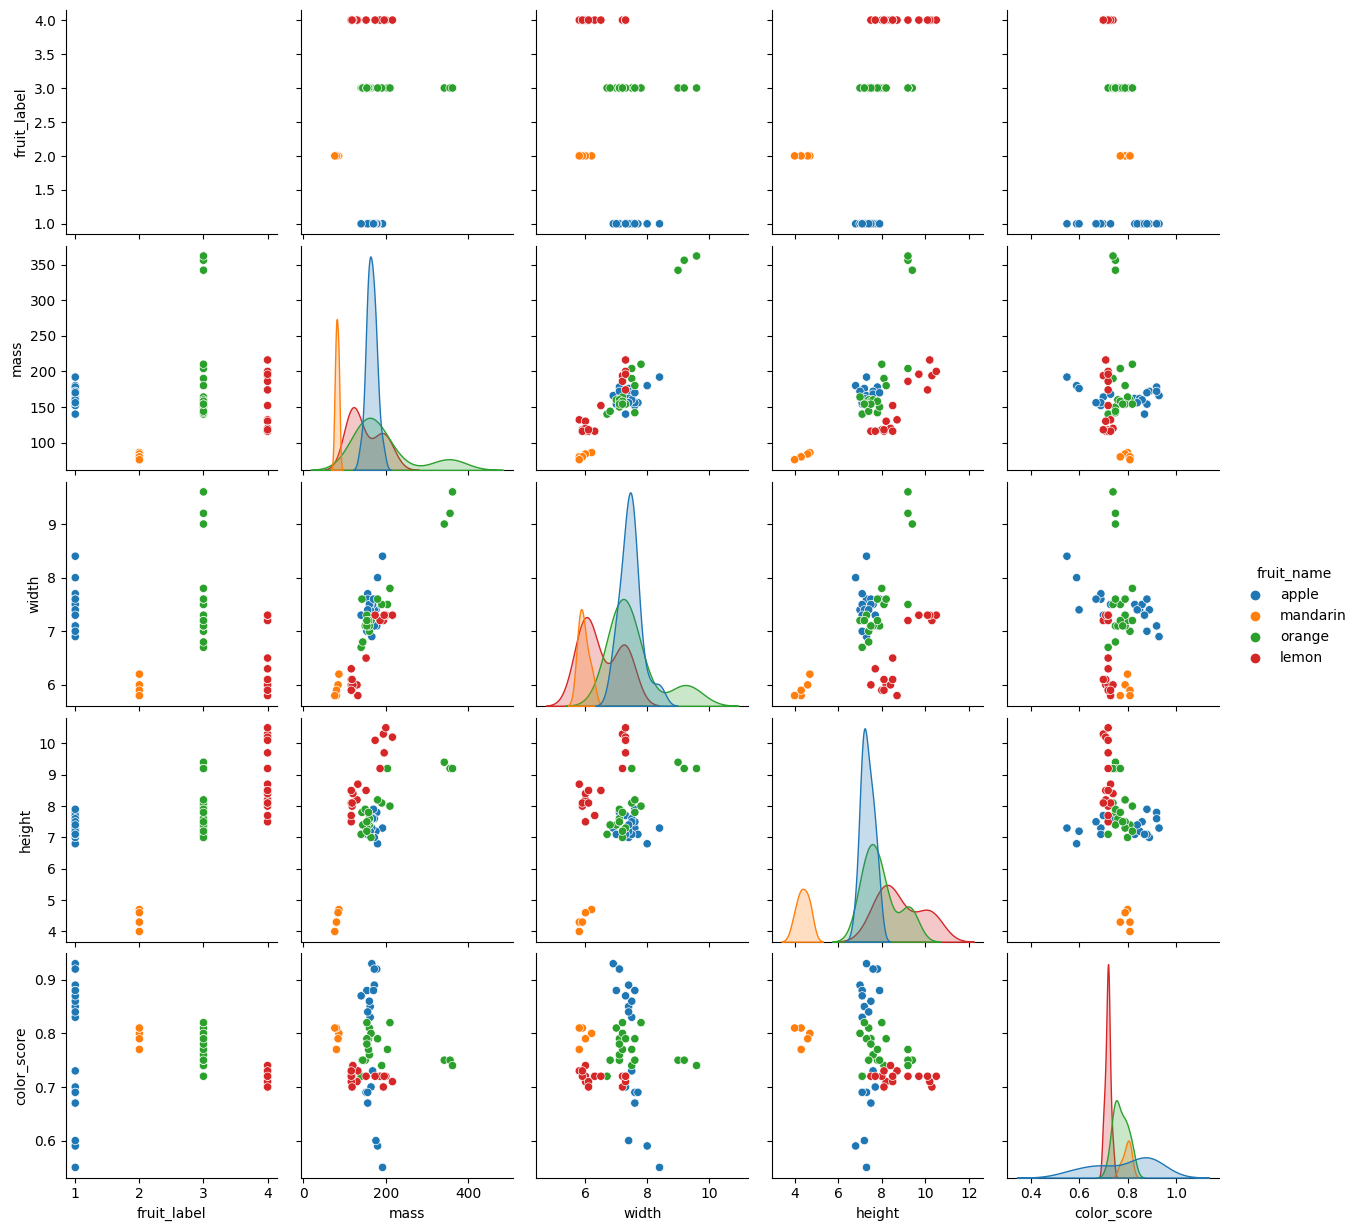

In [15]:
#pairplot    
sns.pairplot(fruit,hue='fruit_name')   

In [16]:
#Training & Testing
feature_names = ['mass', 'width', 'height', 'color_score']    
X = fruit[feature_names]    
y = fruit['fruit_label']    
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)    
from sklearn.preprocessing import MinMaxScaler    
scaler = MinMaxScaler()    
X_train = scaler.fit_transform(X_train)    
X_test = scaler.transform(X_test)   

In [17]:
# DecisionTreeClassifier    
from sklearn.tree import DecisionTreeClassifier    
clf = DecisionTreeClassifier().fit(X_train, y_train)    
print('DecisionTreeClassifier:')    
print('Accuracy of training set: {:.2f}'    
     .format(clf.score(X_train, y_train)))    
print('Accuracy of test set: {:.2f}'    
     .format(clf.score(X_test, y_test))) 


DecisionTreeClassifier:
Accuracy of training set: 1.00
Accuracy of test set: 0.80


In [18]:
#LogisticRegression    
from sklearn.linear_model import LogisticRegression    
logreg = LogisticRegression()    
logreg.fit(X_train, y_train)    
print('LogisticRegression:')    
print('Accuracy of training set: {:.2f}'    
     .format(logreg.score(X_train, y_train)))    
print('Accuracy of test set: {:.2f}'    
     .format(logreg.score(X_test, y_test)))  

LogisticRegression:
Accuracy of training set: 0.80
Accuracy of test set: 0.60


In [19]:
#KNeighborsClassifier    
from sklearn.neighbors import KNeighborsClassifier    
knn = KNeighborsClassifier()    
knn.fit(X_train, y_train)    
print('KNeighborsClassifier:')    
print('Accuracy of on training set: {:.2f}'    
     .format(knn.score(X_train, y_train)))    
print('Accuracy of test set: {:.2f}'    
     .format(knn.score(X_test, y_test)))  


KNeighborsClassifier:
Accuracy of on training set: 0.95
Accuracy of test set: 0.93


In [20]:
#GaussianNB    
from sklearn.naive_bayes import GaussianNB    
gnb = GaussianNB()    
gnb.fit(X_train, y_train)    
print('GaussianNB:')    
print('Accuracy of training set: {:.2f}'    
     .format(gnb.score(X_train, y_train)))    
print('Accuracy of test set: {:.2f}'    
     .format(gnb.score(X_test, y_test)))   

GaussianNB:
Accuracy of training set: 0.86
Accuracy of test set: 0.80


In [21]:
#SVC    
from sklearn.svm import SVC    
svm = SVC()    
svm.fit(X_train, y_train)    
print('Support vectore machine:')    
print('Accuracy of training set: {:.2f}'    
     .format(svm.score(X_train, y_train)))    
print('Accuracy of test set: {:.2f}'    
     .format(svm.score(X_test, y_test)))  

Support vectore machine:
Accuracy of training set: 0.98
Accuracy of test set: 0.93


In [22]:
#pretiction    
from sklearn.metrics import classification_report    
from sklearn.metrics import confusion_matrix    
from sklearn.metrics import accuracy_score    
pred = knn.predict(X_test)    
print(accuracy_score(y_test, pred))    
print(confusion_matrix(y_test, pred))    
print(classification_report(y_test, pred))

0.9333333333333333
[[6 0 0]
 [0 3 1]
 [0 0 5]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           3       1.00      0.75      0.86         4
           4       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.92      0.92        15
weighted avg       0.94      0.93      0.93        15

